In [6]:
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.alphabet as strucalph
import biotite.structure.io.pdbx as pdbx
import matplotlib.pyplot as plt
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics

In [7]:
# You can actually directly read the downloaded PDBx file content
# without an intermediate file
pdbx_file = pdbx.BinaryCIFFile.read(rcsb.fetch("1D3Z", "bcif"))
ubiquitin = pdbx.get_structure(pdbx_file, model=1)
# This structural alphabet expects a peptide chain
ubiquitin = ubiquitin[struc.filter_amino_acids(ubiquitin)]
structural_sequences, chain_starts = strucalph.to_3di(ubiquitin)
print(structural_sequences)
print(chain_starts)

[I3DSequence("dkeweaepvgdididdddqadfplnvlvvvcvvpvapsvfkwkdfprdtgdrvggnvvvvadphgyiyidgddppd")]
[0]


In [8]:
ubiquitin_3di = structural_sequences[0]
print(ubiquitin_3di)

dkeweaepvgdididdddqadfplnvlvvvcvvpvapsvfkwkdfprdtgdrvggnvvvvadphgyiyidgddppd


In [9]:
pdbx_file2 = pdbx.BinaryCIFFile.read(rcsb.fetch("1U4A", "bcif"))
sumo = pdbx.get_structure(pdbx_file2, model=1)
sumo = sumo[struc.filter_amino_acids(sumo)]
sumo_3di = strucalph.to_3di(sumo)[0][0]

In [24]:
matrix = align.SubstitutionMatrix.std_3di_matrix()
print(matrix)

    a   c   d   e   f   g   h   i   k   l   m   n   p   q   r   s   t   v   w   y
a   6  -3   1   2   3  -2  -2  -7  -3  -3 -10  -5  -1   1  -4  -7  -5  -6   0  -2
c  -3   6  -2  -8  -5  -4  -4 -12 -13   1 -14   0   0   1  -1   0  -8   1  -7  -9
d   1  -2   4  -3   0   1   1  -3  -5  -4  -5  -2   1  -1  -1  -4  -2  -3  -2  -2
e   2  -8  -3   9  -2  -7  -4 -12 -10  -7 -17  -8  -6  -3  -8 -10 -10 -13  -6  -3
f   3  -5   0  -2   7  -3  -3  -5   1  -3  -9  -5  -2   2  -5  -8  -3  -7   4  -4
g  -2  -4   1  -7  -3   6   3   0  -7  -7  -1  -2  -2  -4   3  -3   4  -6  -4  -2
h  -2  -4   1  -4  -3   3   6  -4  -7  -6  -6   0  -1  -3   1  -3  -1  -5  -5   3
i  -7 -12  -3 -12  -5   0  -4   8  -5 -11   7  -7  -6  -6  -3  -9   6 -12  -5  -8
k  -3 -13  -5 -10   1  -7  -7  -5   9 -11  -8 -12  -6  -5  -9 -14  -5 -15   5  -8
l  -3   1  -4  -7  -3  -7  -6 -11 -11   6 -16  -3  -2   2  -4  -4  -9   0  -8  -9
m -10 -14  -5 -17  -9  -1  -6   7  -8 -16  10  -9  -9 -10  -5 -10   3 -16  -6  -9
n  -5   0  -2  -

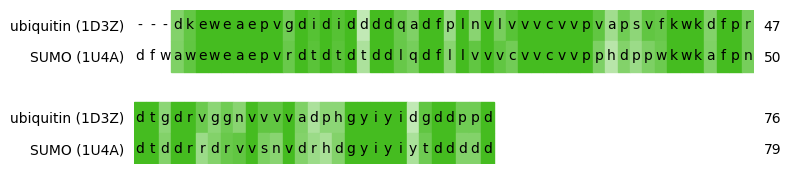

In [21]:
alignment = align.align_optimal(
    ubiquitin_3di,
    sumo_3di,
    matrix,
    gap_penalty=(-10, -1),
    terminal_penalty=False,
    local = False # global alignment
)[0]

fig, ax = plt.subplots(figsize=(8.0, 2.0))
graphics.plot_alignment_similarity_based(
    ax, alignment, matrix=matrix, labels=["ubiquitin (1D3Z)", "SUMO (1U4A)"], symbols_per_line=50,
    show_numbers=True
)

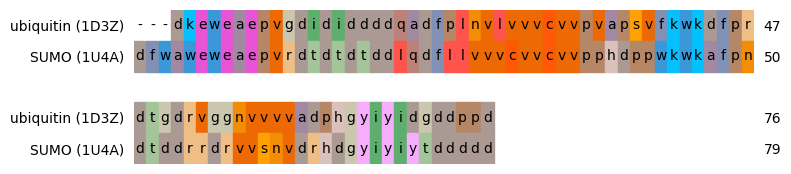

In [22]:
fig, ax = plt.subplots(figsize=(8.0, 2.0))
graphics.plot_alignment_type_based(
    ax, alignment, labels=["ubiquitin (1D3Z)", "SUMO (1U4A)"], symbols_per_line=50,
    show_numbers=True
)